In [1]:
import pandas as pd
import numpy as np

In [2]:
df_friends = pd.read_csv(r"C:\Users\apoor\Desktop\Data Science Projects\Friends Dataset\Friends.csv")

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df_friends.head()

,Text,Speaker,Episode,Season,Show
0,Originally written by Marta Kauffman and David...,NaN,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends
1,Transcribed by guineapig.,NaN,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends
2,CENTRAL PERK. (ALL PRESENT EXCEPT RACHEL AND ...,SCENE 1,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends
3,There's nothing to tell! He's just some guy I...,MONICA,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends
4,"C'mon, you're going out with the guy! There's...",JOEY,Episode-01-The One Where Monica Gets a New Roo...,Season-01,Friends


In [5]:
df_friends.shape

(69974, 5)

In [6]:
df_friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69974 entries, 0 to 69973
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     69974 non-null  object
 1   Speaker  63690 non-null  object
 2   Episode  69974 non-null  object
 3   Season   69974 non-null  object
 4   Show     69974 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB


In [7]:
df_friends.isnull().sum()

Text          0
Speaker    6284
Episode       0
Season        0
Show          0
dtype: int64

In [8]:
df_friends.dropna(subset= 'Speaker' , axis=0, inplace=True)
df_friends = df_friends.reset_index(drop= True)

In [9]:
df = df_friends[['Text' , 'Speaker']]

In [10]:
df.head()

,Text,Speaker
0,CENTRAL PERK. (ALL PRESENT EXCEPT RACHEL AND ...,SCENE 1
1,There's nothing to tell! He's just some guy I...,MONICA
2,"C'mon, you're going out with the guy! There's...",JOEY
3,So does he have a hump? A hump and a hairpiece?,CHANDLER
4,"Wait, does he eat chalk?",PHOEBE


In [11]:
df = df.apply(lambda x: x.astype(str).str.lower().str.strip())

In [12]:
speaker_counts = df['Speaker'].value_counts()
speaker_counts.head(15)

Speaker
ross          8870
rachel        8774
chandler      8058
joey          8047
monica        7965
phoebe        7153
[scene        2833
mike           355
all            332
rach           325
mnca           259
richard        254
chan           233
janice         208
mr. geller     204
Name: count, dtype: int64

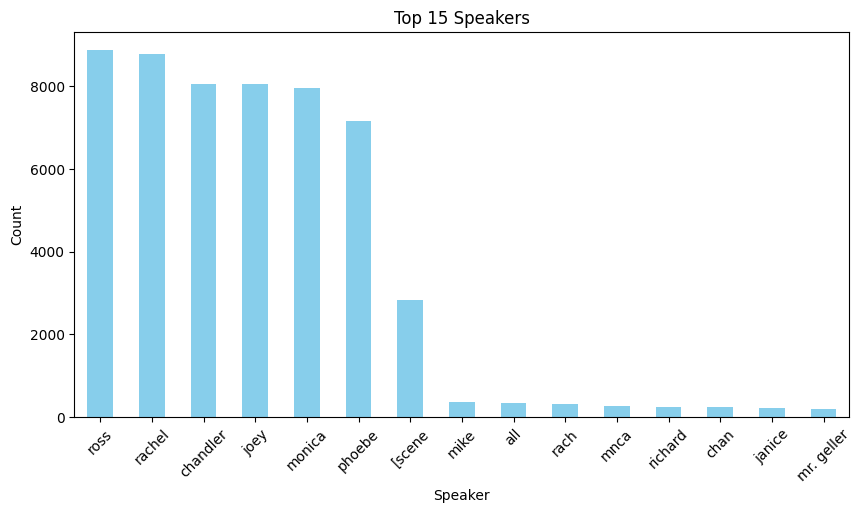

In [13]:
import matplotlib.pyplot as plt

speaker_counts.head(15).plot(kind='bar', figsize=(10, 5), color='skyblue')

plt.xlabel('Speaker')
plt.ylabel('Count')
plt.title('Top 15 Speakers')
plt.xticks(rotation=45)
plt.show()


In [14]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [15]:
from fuzzywuzzy import process

# Example column data
Speakers =  df['Speaker'].unique()  # Get unique names
matches = process.extract("Rachel", Speakers, limit=10)  # Find top 10 close matches

print(matches)


[('rachel', 100), ('racel', 91), ('rache', 91), ('rach', 90), ('rachel and phoebe', 90), ('rachel/phoebe', 90), ('monica & rachel', 90), ('rachel and monica', 90), ('phoebe, rachel', 90), ('phoebe/rachel', 90)]


C:\Users\apoor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [16]:
df_multi_word = df[df['Speaker'].str.split().str.len() > 1]
df_multi_word.sample(20)

,Text,Speaker
31937,"(to joey) if you leave now, i will chop off my...",joey's hand twin
42218,"well, she’ll understand right? it’s not like i...",mr. geller
2724,"well,... thanks.",coma guy
6539,he didn't have any.,mr. boyle
61571,"(he enters with erica) monica, chandler. i'd l...",agency guy
23274,"actually, giving birth to three babies isn’t t...",the doctor
6463,"oh my god, todd! what the hell did you do?",store guy
2718,"so, the etch-a-sketch is from you guys?",coma guy
21438,"(entering) hey, dragon! here’s your tips from ...",a waiter
53488,marta kauffman & david crane,written by


In [17]:
df = df[~df.index.isin(df_multi_word.index)]

In [18]:
main_characters = ["ross", "rachel", "chandler", "joey", "monica", "phoebe"]


def correct_name(name):
    match, score = process.extractOne(name, main_characters)  # Find best match
    return match if score > 80 else name  # Replace only if similarity > 80%

# Apply function to the column
df['Speaker'] = df['Speaker'].apply(correct_name)

In [19]:
speaker_counts = df['Speaker'].value_counts()
speaker_counts.head(10)

Speaker
rachel      9108
ross        8875
chandler    8293
joey        8063
monica      7966
phoebe      7354
[scene      2833
mike         355
all          332
mnca         259
Name: count, dtype: int64

In [20]:
df = df[df['Speaker'].isin(main_characters)]

In [21]:
df.head(1)

,Text,Speaker
1,there's nothing to tell! he's just some guy i ...,monica


## Adding features

In [22]:
df["sentence_length"] = df["Text"].apply(lambda x: len(x))  
df["word_count"] = df["Text"].apply(lambda x: len(x.split())) 

In [23]:
df[df['word_count'] < 5]

,Text,Speaker,sentence_length,word_count
11,instead of...?,joey,14,2
12,that's right.,chandler,13,2
13,never had that dream.,joey,21,4
14,no.,phoebe,3,1
16,(mortified) hi.,ross,15,2
...,...,...,...,...
63671,right!,ross,6,1
63676,what?,rachel,5,1
63678,you really think so?,rachel,20,4
63679,i really do.,ross,12,3


## Text Preprocessing

In [24]:
import spacy
import re
import contractions

In [25]:
nlp = spacy.load("en_core_web_sm")
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = contractions.fix(text)  # Expand contractions (e.g., "don't" → "do not")
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r"\[.*?\]|\(.*?\)|\*.*?\*", "", text)  # Remove non-verbal actions
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    
    return text

# Apply function to the Text column
df["cleaned_text"] = df["Text"].apply(preprocess_text)

# Display sample output
df[["Text", "cleaned_text"]].head()


,Text,cleaned_text
1,there's nothing to tell! he's just some guy i ...,there is nothing to tell he is just some guy i...
2,"c'mon, you're going out with the guy! there's ...",cmon you are going out with the guy there is g...
3,so does he have a hump? a hump and a hairpiece?,so does he have a hump a hump and a hairpiece
4,"wait, does he eat chalk?",wait does he eat chalk
5,"just, 'cause, i don't want her to go through w...",just because i do not want her to go through w...


In [26]:
def extract_pos_tags(text):
    doc = nlp(text)
    
    # Extract nouns, verbs, and adjectives while handling edge cases
    nouns = [token.lemma_ for token in doc if token.pos_ == "NOUN" and token.is_alpha]
    verbs = [token.lemma_ for token in doc if token.pos_ == "VERB" and token.is_alpha]
    adjectives = [token.lemma_ for token in doc if token.pos_ == "ADJ" and token.is_alpha]
    
    return " ".join(nouns), " ".join(verbs), " ".join(adjectives)

# Apply function to the Text column
df["nouns"], df["verbs"], df["adjectives"] = zip(*df["Text"].apply(extract_pos_tags))

# Display first few rows
df.head()


,Text,Speaker,sentence_length,word_count,cleaned_text,nouns,verbs,adjectives
1,there's nothing to tell! he's just some guy i ...,monica,56,11,there is nothing to tell he is just some guy i...,guy,tell work,
2,"c'mon, you're going out with the guy! there's ...",joey,80,14,cmon you are going out with the guy there is g...,guy,go get,wrong
3,so does he have a hump? a hump and a hairpiece?,chandler,47,11,so does he have a hump a hump and a hairpiece,hump hump hairpiece,have,
4,"wait, does he eat chalk?",phoebe,24,5,wait does he eat chalk,,wait eat chalk,
5,"just, 'cause, i don't want her to go through w...",phoebe,79,16,just because i do not want her to go through w...,,want go go,


In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode Speaker column
label_encoder = LabelEncoder()
df["speaker_encoded"] = label_encoder.fit_transform(df["Speaker"])

# Mapping back the encoded values
speaker_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Speaker Encoding Mapping:", speaker_mapping)


Speaker Encoding Mapping: {'chandler': np.int64(0), 'joey': np.int64(1), 'monica': np.int64(2), 'phoebe': np.int64(3), 'rachel': np.int64(4), 'ross': np.int64(5)}


In [28]:
def extract_pos_counts(text):
    doc = nlp(text)
    
    noun_count = sum(1 for token in doc if token.pos_ == "NOUN" and token.is_alpha)
    verb_count = sum(1 for token in doc if token.pos_ == "VERB" and token.is_alpha)
    adjective_count = sum(1 for token in doc if token.pos_ == "ADJ" and token.is_alpha)
    
    return noun_count, verb_count, adjective_count

# Apply function to get POS counts
df["noun_count"], df["verb_count"], df["adjective_count"] = zip(*df["Text"].apply(extract_pos_counts))

# Display updated DataFrame
df.head()


,Text,Speaker,sentence_length,word_count,cleaned_text,nouns,verbs,adjectives,speaker_encoded,noun_count,verb_count,adjective_count
1,there's nothing to tell! he's just some guy i ...,monica,56,11,there is nothing to tell he is just some guy i...,guy,tell work,,2,1,2,0
2,"c'mon, you're going out with the guy! there's ...",joey,80,14,cmon you are going out with the guy there is g...,guy,go get,wrong,1,1,2,1
3,so does he have a hump? a hump and a hairpiece?,chandler,47,11,so does he have a hump a hump and a hairpiece,hump hump hairpiece,have,,0,3,1,0
4,"wait, does he eat chalk?",phoebe,24,5,wait does he eat chalk,,wait eat chalk,,3,0,3,0
5,"just, 'cause, i don't want her to go through w...",phoebe,79,16,just because i do not want her to go through w...,,want go go,,3,0,3,0


In [29]:
df.isnull().sum()

Text               0
Speaker            0
sentence_length    0
word_count         0
cleaned_text       0
nouns              0
verbs              0
adjectives         0
speaker_encoded    0
noun_count         0
verb_count         0
adjective_count    0
dtype: int64

In [30]:
df.shape

(49659, 12)

In [31]:
from sklearn.preprocessing import StandardScaler
numeric_features = ["sentence_length", "word_count", "noun_count", "verb_count", "adjective_count"]

scaler = StandardScaler()
df_scaled_numeric = pd.DataFrame(scaler.fit_transform(df[numeric_features]), columns=numeric_features)

In [32]:
df_scaled_numeric.head(1)

,sentence_length,word_count,noun_count,verb_count,adjective_count
0,-0.073756,-0.05315,-0.251442,0.032153,-0.618882


In [33]:
df_scaled_numeric.shape

(49659, 5)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df["cleaned_text"])
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

In [35]:
df_tfidf.shape

(49659, 1000)

In [36]:
df_tfidf.isnull().sum()

able          0
about         0
absolutely    0
across        0
acting        0
             ..
young         0
your          0
yours         0
yourself      0
youyou        0
Length: 1000, dtype: int64

In [37]:
df_scaled_numeric.reset_index(drop=True, inplace=True)
df_tfidf.reset_index(drop=True, inplace=True)
df["speaker_encoded"].reset_index(drop=True, inplace=True)

In [38]:
df_final = pd.concat([df["speaker_encoded"], df_scaled_numeric, df_tfidf], axis=1)
df_final.head()

,speaker_encoded,sentence_length,word_count,noun_count,verb_count,adjective_count,able,about,absolutely,across,acting,actor,actually,afraid,after,again,against,ago,ah,ahead,ahh,air,all,almost,alone,along,already,alright,also,although,always,am,amazing,ami,an,and,andand,another,answer,any,anybody,anymore,anyone,anything,anyway,apartment,apparently,appreciate,are,areyou,around,as,ask,asked,asking,asleep,ass,assistant,at,ate,audition,aunt,aw,away,aww,babies,baby,back,bad,bag,ball,barry,bathroom,be,beautiful,because,bed,bedroom,been,before,behind,being,believe,ben,besides,best,bet,better,between,big,bigger,bing,birthday,bit,bitch,blue,boat,bob,body,book,borrow,boss,both,bought,box,boxes,boy,boyfriend,boys,bra,break,bring,broke,broken,brother,brought,bucks,buddy,building,bunch,business,but,butt,buy,by,bye,byebye,cab,cake,call,called,calling,calls,calm,came,can,candy,cannot,car,card,care,careful,cares,carol,case,cat,catch,chair,chance,chandler,chandlers,change,charlie,check,cheese,chef,chicken,child,children,christmas,city,class,clean,clear,clock,close,clothes,club,cmon,coat,coffee,cold,college,come,comes,comfortable,coming,company,completely,congratulations,control,conversation,cookies,cool,couch,could,count,couple,course,crap,crazy,credit,cry,crying,cup,cut,cute,dad,daddy,damn,damnit,dance,date,dating,david,day,days,dead,deal,dear,decide,decided,definitely,did,die,died,different,dinner,divorce,divorced,do,doctor,does,dog,doing,dollars,done,dont,door,down,dr,drake,dream,dress,dressed,drink,drive,drunk,duck,dude,each,early,easy,eat,eh,eight,either,else,emily,emma,...,sick,side,sign,since,sing,single,sir,sister,sisters,sit,sitting,situation,six,sleep,sleeping,slept,small,smart,smell,smoke,so,soap,some,somebody,someone,something,sometimes,son,song,soo,soon,sorry,sort,soso,sound,sounds,special,spend,spent,stand,star,start,started,starts,stay,stick,still,stole,stop,store,story,straight,street,strong,stuck,stuff,stupid,such,suck,sucks,supposed,sure,surprise,susan,swear,sweet,sweetie,sx,table,take,takes,taking,talk,talked,talking,tape,teach,tell,telling,ten,terrible,than,thank,thanks,thanksgiving,that,thatthat,the,their,them,then,there,these,they,thing,things,think,thinking,thinks,third,this,those,though,thought,three,through,throw,tickets,time,times,tiny,tired,to,today,together,told,tomorrow,tonight,too,took,top,totally,touch,tough,town,tribbiani,tried,trip,trouble,true,trust,try,trying,tulsa,turkey,turn,turned,turns,tv,two,ugh,ugly,uh,uhh,uhhuh,uhm,uhoh,um,umm,unbelievable,under,understand,underwear,unless,until,up,upset,us,use,used,using,very,wait,waiting,wake,walk,walking,want,wanted,wants,was,watch,watching,water,way,we,wear,wearing,wedding,week,weekend,weeks,weird,welcome,well,went,were,wewe,wha,what,whatever,whatwhat,when,where,which,while,who,whoa,whole,why,wife,will,win,window,wine,wish,with,without,woah,woman,women,won,wonder,wonderful,wondering,word,words,work,worked,working,works,world,worried,worry,worse,worst,worth,would,wow,write,writing,wrong,wrote,ya,yay,yeah,year,years,yep,yes,yesterday,yet,yknow,york,you,young,your,yours,yourself,youyou
0,2,-0.073756,-0.053150,-0.251442,0.032153,-0.618882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [39]:
print(df_final.isnull().sum().sum()) 

0


In [40]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_final.drop(columns=["speaker_encoded"])  # Features
y = df_final["speaker_encoded"]  # Target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (39727, 1005)
Test size: (9932, 1005)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=500, random_state=42)
print("\n🚀 Training Logistic Regression...\n")
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"🔹 Logistic Regression Accuracy: {accuracy_log_reg:.4f}\n")
print(classification_report(y_test, y_pred_log_reg))



🚀 Training Logistic Regression...

🔹 Logistic Regression Accuracy: 0.2764

              precision    recall  f1-score   support

           0       0.24      0.25      0.25      1659
           1       0.29      0.31      0.30      1612
           2       0.25      0.24      0.25      1593
           3       0.30      0.21      0.25      1471
           4       0.30      0.36      0.33      1822
           5       0.27      0.28      0.27      1775

    accuracy                           0.28      9932
   macro avg       0.28      0.27      0.27      9932
weighted avg       0.28      0.28      0.27      9932



In [42]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
print("\n🚀 Training Random Forest...\n")
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"🔹 Random Forest Accuracy: {accuracy_rf:.4f}\n")
print(classification_report(y_test, y_pred_rf))



🚀 Training Random Forest...

🔹 Random Forest Accuracy: 0.2679

              precision    recall  f1-score   support

           0       0.25      0.27      0.26      1659
           1       0.28      0.29      0.28      1612
           2       0.25      0.21      0.23      1593
           3       0.26      0.20      0.23      1471
           4       0.29      0.34      0.31      1822
           5       0.27      0.29      0.28      1775

    accuracy                           0.27      9932
   macro avg       0.27      0.26      0.26      9932
weighted avg       0.27      0.27      0.27      9932



In [43]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
print("\n🚀 Training XGBoost...\n")
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"🔹 XGBoost Accuracy: {accuracy_xgb:.4f}\n")
print(classification_report(y_test, y_pred_xgb))



🚀 Training XGBoost...



C:\Users\apoor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [16:22:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 XGBoost Accuracy: 0.2669

              precision    recall  f1-score   support

           0       0.24      0.26      0.25      1659
           1       0.28      0.26      0.27      1612
           2       0.25      0.21      0.23      1593
           3       0.30      0.19      0.23      1471
           4       0.28      0.39      0.33      1822
           5       0.26      0.27      0.26      1775

    accuracy                           0.27      9932
   macro avg       0.27      0.26      0.26      9932
weighted avg       0.27      0.27      0.26      9932



In [44]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel='linear', random_state=42)
print("\n🚀 Training SVM...\n")
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"🔹 SVM Accuracy: {accuracy_svm:.4f}\n")
print(classification_report(y_test, y_pred_svm))



🚀 Training SVM...

🔹 SVM Accuracy: 0.2738

              precision    recall  f1-score   support

           0       0.24      0.29      0.26      1659
           1       0.28      0.31      0.30      1612
           2       0.25      0.23      0.24      1593
           3       0.32      0.18      0.23      1471
           4       0.30      0.36      0.33      1822
           5       0.27      0.27      0.27      1775

    accuracy                           0.27      9932
   macro avg       0.28      0.27      0.27      9932
weighted avg       0.28      0.27      0.27      9932



In [ ]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
print("\n🚀 Training MLP Neural Network...\n")
mlp.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test)

# Evaluation
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"🔹 MLP Neural Network Accuracy: {accuracy_mlp:.4f}\n")
print(classification_report(y_test, y_pred_mlp))



🚀 Training MLP Neural Network...

